#### __POSTTEST 5 KECERDASAN BUATAN__
#### Nama : Puput Widyastuti
#### Nim     : 2109106074
#### Kelas   : Informatika B1 2021

In [1]:
import numpy as np   #Untuk mengimpor library numpy
import pandas as pd  #Untuk mengimpor library pandas
import matplotlib.pyplot as plt  #Untuk mengimpor library matplotlib
from sklearn.svm import SVC      #Untuk mengimpor implementasi Support Vector Classifier (SVC) 
from sklearn.model_selection import train_test_split  #mengimpor fungsi train_test_split dari scikit-learn
from sklearn.metrics import confusion_matrix, classification_report  #mengimpor fungsi confusion_matrix dari scikit-learn
from sklearn.neighbors import KNeighborsClassifier   # mengimpor implementasi K-Nearest Neighbors (KNN) Classifier dari scikit-learn
from sklearn.inspection import DecisionBoundaryDisplay #mengimpor fungsi DecisionBoundaryDisplay dari scikit-learn
import seaborn as sns
from sklearn.linear_model import LinearRegression  #untuk memodelkan hubungan linier antara variabel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  #mengukur kesalahan rata-rata dari model regresi terhadap data sebenarnya
from sklearn.cluster import KMeans #untuk mengelompokkan data menjadi kelompok-kelompok berdasarkan kesamaan
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score #mengukur seberapa baik pengelompokan menghasilkan kelompok yang jelas dan terpisah satu sama lain
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score # mengukur seberapa baik pengelompokan cocok dengan pengelompokan sebenarnya

#untu membaca dataset
df = pd.read_csv('Global_Missing_Migrants_Encoded.csv')
df

,Incident Type,Incident year,Reported Month,Region of Origin,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,...,Region of Incident_Mediterranean,Region of Incident_Middle Africa,Region of Incident_North America,Region of Incident_Northern Africa,Region of Incident_South America,Region of Incident_South-eastern Asia,Region of Incident_Southern Africa,Region of Incident_Southern Asia,Region of Incident_Western Africa,Region of Incident_Western Asia
0,Incident,2014,January,Central America,Guatemala,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Incident,2014,January,Latin America / Caribbean (P),Unknown,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Incident,2014,January,Latin America / Caribbean (P),Unknown,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Incident,2014,January,Central America,Mexico,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Incident,2014,January,Northern Africa,Sudan,1.0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,Incident,2023,July,Western Asia,Syrian Arab Republic,4.0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
12375,Incident,2023,July,Western Africa (P),Unknown,2.0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
12376,Incident,2023,July,Western Africa,Senegal,13.0,0,13,6,0,...,0,0,0,1,0,0,0,0,0,0
12377,Incident,2023,July,Mixed,Unknown,6.0,0,6,48,0,...,0,0,0,1,0,0,0,0,0,0


In [2]:
#untuk menampilkan info dari dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Incident Type                          12379 non-null  object 
 1   Incident year                          12379 non-null  int64  
 2   Reported Month                         12379 non-null  object 
 3   Region of Origin                       12379 non-null  object 
 4   Country of Origin                      12379 non-null  object 
 5   Number of Dead                         12379 non-null  float64
 6   Minimum Estimated Number of Missing    12379 non-null  int64  
 7   Total Number of Dead and Missing       12379 non-null  int64  
 8   Number of Survivors                    12379 non-null  int64  
 9   Number of Females                      12379 non-null  int64  
 10  Number of Males                        12379 non-null  int64  
 11  Nu

**LINEAR REGRESSION**

In [3]:
#mengatur kolom yang akan digunakan
X = df[['Minimum Estimated Number of Missing', 'Number of Survivors']]

In [4]:
#untuk mengatur kolom yang akan digunakan sebgaia target
y = df['Number of Dead']

In [5]:
#untuk membagi dataset mejadi subset (data pelatihan & data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#memodelkan hubungan antara variable dengan model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
#untuk membuat prediksi
y_pred = model.predict(X_test)

In [7]:
#menghitung Mean Absolute Error (MAE) dari model regresi
mae = mean_absolute_error(y_test, y_pred)
#menghitung Mean Squared Error (MSE) dari model regresi
mse = mean_squared_error(y_test, y_pred)
#menghitung Root Mean Squared Error (RMSE) dari model regresi
rmse = (mse**0.5)
#menghitung koefisien determinasi, juga dikenal sebagai R-squared (R2)
r2=r2_score(y_test, y_pred)
#untuk menampilkan hasil code diatas
print('===================================')
print('MAE      : ', mae)
print('MSE      : ', mse)
print('RMSE     : ', rmse)
print('R2_Score : ', r2)
print('===================================')

MAE      :  2.4127072332799298
MSE      :  81.29622081299426
RMSE     :  9.016441693539324
R2_Score :  0.027483864483861087


### Ket:

- Mean Absolute Error (MAE) : Nilai MAE sekitar 2.41. 
  Ini berarti rata-rata kesalahan absolut antara nilai prediksi model dan nilai sebenarnya adalah sekitar 2.41. MAE memberikan perkiraan rata-rata seberapa jauh prediksi model dari nilai sebenarnya. Semakin rendah MAE, semakin baik kinerja model.

- Mean Squared Error (MSE) : Nilai MSE sekitar 81.2. 
  Ini berarti rata-rata kesalahan kuadrat antara nilai prediksi model dan nilai sebenarnya adalah sekitar 81.2. 

- Root Mean Squared Error (RMSE) : Nilai RMSE sekitar 9.01. 
  Ini mengukur rata-rata dari selisih antara prediksi model dan nilai sebenarnya dalam unit yang sama seperti data asli. RMSE lebih interpretatif karena memiliki unit yang sama dengan variabel target. Semakin rendah RMSE, semakin baik kinerja model.

- R-squared Score (R2-Score) : Nilai R2 sekitar 0.02. 
  Nilai R2-Score berkisar antara 0 hingga 1. R2-Score sekitar 0.02 berarti bahwa model hanya dapat menjelaskan sekitar 2% variasi dalam dta


Text(0.5, 1.0, 'Evaluation Metrics')

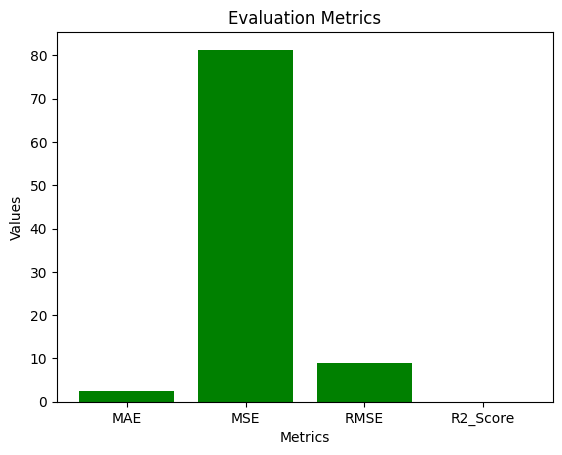

In [8]:
#membuat tabel berdasarkan metrik evaluasi regresi linear
metrics = ['MAE', 'MSE', 'RMSE', 'R2_Score']
values = [mae, mse, rmse, r2]
#untuk membuat diagram batang
plt.bar(metrics, values, color='green')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')

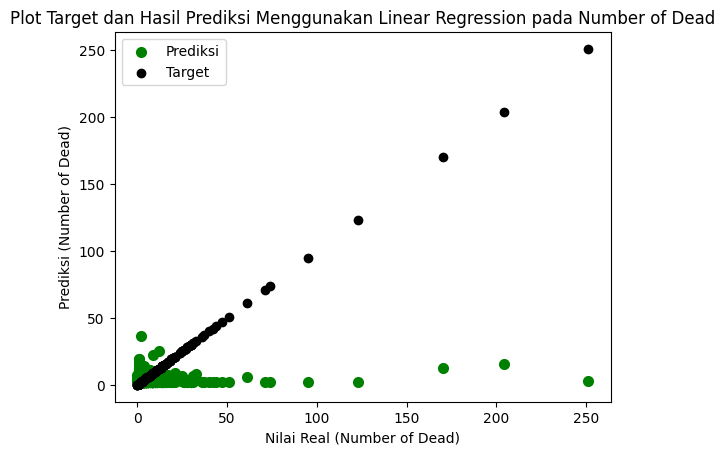

In [24]:
#untuk membuat scatter plot
plt.scatter(y_test, y_pred, c='green', label='Prediksi', linewidth=2)
#untuk menambahkan scatter plot kedua untuk membandingkan target aktual dengan dirinya sendiri (y_test vs. y_test)
plt.scatter(y_test, y_test, c='black', label='Target')
#untuk membuat perwakilan nilai real
plt.xlabel('Nilai Real (Number of Dead)')
#untuk membuat perwakilan nilai prediksi
plt.ylabel('Prediksi (Number of Dead)')
plt.title('Plot Target dan Hasil Prediksi Menggunakan Linear Regression pada Number of Dead')
#untuk menambah keterangan pada plot
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

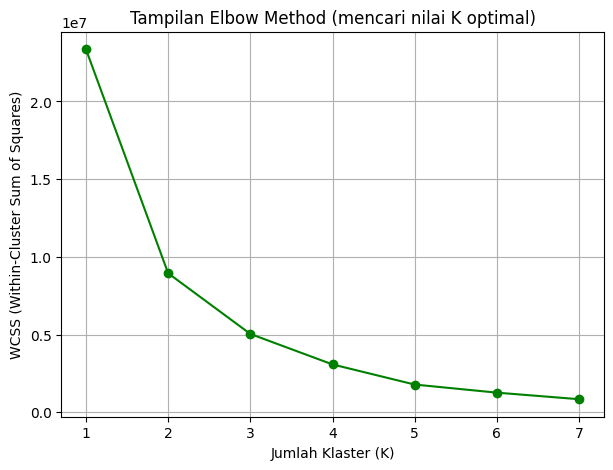

In [10]:
#mengambil kolom data tertentu untuk clustering
X = df.iloc[:, [1, 8]].values
#varible untuk hasil perhitungan wcss
wcss=[]
#perulangan untuk mengecek dari k=1 sampai k=7
for k in range(1, 8):
    model=KMeans(n_clusters=k, n_init=10, random_state=0)
    #untuk melatih K-means
    model.fit(X)
    #untuk menambah hasil ke variable wcss
    wcss.append(model.inertia_)

#untuk membuat gambar (plot) dengan ukuran yang ditentukan
plt.figure(figsize=(7,5))
plt.plot(range(1, 8), wcss, marker='o', linestyle='-', color='green')
plt.title('Tampilan Elbow Method (mencari nilai K optimal)')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show

In [29]:
#jumlah kluster yang ingin bentuk dalam analisis clustering
k = 89
#objek kmeans untuk menentukan jumlah initialisasi
kmeans = KMeans(k, n_init=10)
#menentukan kolom yang akan digunakan
X = df[['Number of Survivors', 'Total Number of Dead and Missing']]
kmeans.fit(X)
#untuk memprediksi kluster untuk setiap sampel dalam dataset X
predicted_clusters = kmeans.predict(X)
#menambahkan kolom baru 'cluster' ke dalam dataset
df['cluster']=predicted_clusters
#dataset tanpa label
s_score = silhouette_score(X, predicted_clusters)
print('=======================================')
print(f'==  Silhouette Score : {s_score:.2f}')
db_index = davies_bouldin_score(X, predicted_clusters)
print(f'==  Davies_Bouldin_Index : {db_index:.2f}')
ch_index = calinski_harabasz_score(X, predicted_clusters)
print(f'==  Calinski_Harabasz Index: {ch_index:.2f} ')
print('=======================================')

==  Silhouette Score : 0.78
==  Davies_Bouldin_Index : 0.50
==  Calinski_Harabasz Index: 70740.80 


In [12]:
#variable untuk kolom yang digunakan
true_labels=df['Number of Dead']
#digunakan untuk membuat tabel silang (crosstabulation)
cross_tab = pd.crosstab(predicted_clusters, true_labels)
print('=====================================================================================')
print('                                 Cross_Tabulation :                                  ')
print('=====================================================================================')
print(cross_tab, '\n')
print('=====================================================================================')

                                 Cross_Tabulation :                                  
Number of Dead  0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    \
row_0                                                                           
0                  24   8719   1326    640    289    203    145    110     80   
1                   0     13      2      3      1      4      1      2      0   
2                   2    133     34     19      7     13     10      7      9   
3                   3      2      0      1      0      0      0      0      0   

Number of Dead  9.0    ...  117.0  120.0  123.0  133.0  160.0  167.0  170.0  \
row_0                  ...                                                    
0                  56  ...      1      1      1      0      0      1      0   
1                   0  ...      0      0      0      0      0      0      0   
2                   3  ...      0      0      0      0      1      0      0   
3                   1  ...      

In [18]:
#untuk menghitung skor Adjusted Rand Index (ARI) antara 2 pengelompokan atau clustering
adj = adjusted_rand_score(true_labels, predicted_clusters)
print(f'Adjusted Rand Score : {adj:.2f}')


Adjusted Rand Score : 0.05


In [14]:
#menghitung NMI antara pengelompokan yang diprediksi dengan data asli
nmi_Total_Number_of_Dead_and_Missing = normalized_mutual_info_score(df['Total Number of Dead and Missing'], predicted_clusters)
nmi_Number_of_Survivors = normalized_mutual_info_score(df['Number of Survivors'], predicted_clusters)
print('=========================================================================== ')
print(f"Normalized Mutual Information (NMI) Total Number of Dead and Missing: {nmi_Total_Number_of_Dead_and_Missing:.2f}")
print(f"Normalized Mutual Information (NMI) Number of Survivors             : {nmi_Number_of_Survivors:.2f}")
print('===========================================================================')

Normalized Mutual Information (NMI) Total Number of Dead and Missing: 0.04
Normalized Mutual Information (NMI) Number of Survivors             : 0.21


In [15]:
#menghitung tingkat homogenitas pengelompokan yang telah diprediksi 
homogeneity = homogeneity_score(true_labels, predicted_clusters)
print('=======================================')
print(f"==      Homogeneity Score   : {homogeneity:.2f}")
print('=======================================')
#menghitung kelengkapan pengelompokan yang telah diprediksi terhadap pengelompokan sebenarnya
completeness = completeness_score(true_labels, predicted_clusters)
print(f"==      Completeness Score  : {completeness:.2f}")
print('=======================================')
#menghitung skor V-Measure
v_measure = v_measure_score(true_labels, predicted_clusters)
print(f"==      V-Measure Score     : {v_measure:.2f}")
print('=======================================')

==      Homogeneity Score   : 0.01
==      Completeness Score  : 0.13
==      V-Measure Score     : 0.03


In [ ]:
#membuat sebuah objek gambar dengan ukuran yang ditentukan 
plt.figure(figsize=(7, 11))
#mendefinisikan daftar warna yang akan digunakan untuk plot
colors = ['green', 'red', 'yellow']
#untuk membuat scatter plot dengan menggunakan Seaborn.
sns.scatterplot(data=df, x='Total Number of Dead and Missing', y='Number of Survivors', palette=colors, hue='cluster', marker='o', s=130, label='Predicted')
sns.scatterplot(data=df, x='Total Number of Dead and Missing', y='Number of Survivors', palette=colors, hue='Number of Dead', marker='o', s=40, label='True Labels')

#mengambil data yang telah dikelompokkan oleh algoritma clustering K-Means
cluster_centers = df.groupby("cluster").mean()
#untuk membuat scatter plot
sns.scatterplot(data=cluster_centers, x=cluster_centers['Total Number of Dead and Missing'], y=cluster_centers['Number of Survivors'], palette=colors, hue=cluster_centers.index, marker='*', s=200, label='Cluster Centers')
plt.title('K=4 dengan True Labels and Cluster Centers')
plt.xlabel('Total Number of Dead and Missing')
plt.ylabel('Number of Survivors')
plt.legend(title="Legend", loc="upper right")
plt.show()
